# SEP Machine Learning

## Data Preprocessing

### Normalize the data with mean and standard deviation

Normalize the training and testing data using the following formula:

$$X_{normalized} = \frac{X-\mu_X}{\sigma_X}$$

Calculate the mean and standard deviation __on the training data__ only (also when you normalize the testing dataset).

`Pandas` provides built-in functions to calculate the average and the standard deviation. For example, `X_train.mean()` returns the average value per feature in the training dataset while `X_train.std()` returns the standard deviation per feature.

In [ ]:
normalized_X_train = (X_train - X_train.mean()) / X_train.std()
normalized_X_test = (X_test - X_train.mean()) / X_train.std()
#Immer nur mean() und std() von Trainingdaten und nicht von Testdaten verwenden, weil letztere nie ins Model laufen dürfen.

Call the two classification functions (decision_tree and SVC) again with the normalized data and report the changes in accuracy. What do you notice?
**Answer:** Accuracy ändert sich nach dem Normalisieren (verbessert sich)

### Task with min-max Normalization

Repeat the task 1b but use the following formula to normalize tha data:

$$X_{normalized} = \frac{X-X_{min}}{X_{max} - X_{min}}$$

Again, calculate the mean and standard deviation __on the training data__ only (also when you normalize the testing dataset) and use the built-in function `X_train.min()` resp. `X_train.max()`.

In [ ]:
normalized_X_train_2 = (X_train - X_train.min()) / (X_train.max() - X_train.min())
normalized_X_test_2 = (X_test - X_train.min()) / (X_train.max() - X_train.min())
#Normalization gibt eine homogenere Verteilung, wenn wir alle Daten in eine vergleichbare Range bringen 
#gleichen wir die Auswirkungen aus (grosse Zahlen, haben nicht mehr grössere Wirkung/Gewicht)
#Desicion Tree Classifier behandelt jede Column/Dimension
#Support Vector Classifier schaut die Daten alle insgesamt an, darum wird es beeinflusst durch die Grössenanpassung

### Binning

The following list consists of the age of several people: 
```python
[13, 15, 16, 18, 19, 20, 20, 21, 22, 22, 25, 25, 26, 26, 30, 33, 34, 35, 35, 35, 36, 37, 40, 42, 46, 53, 70]
```

### Equal-Width Binning
Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins.

Tips:
1. Calculate the size of the bins
2. Assign each value to the corresponding bin
3. Calculate the mean per bin
4. Replace each value by the mean of its bin

__Solve this exercise by hand without using Python__### Task 3a: Equal-Width Binning
Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins.

Tips:
1. Calculate the size of the bins
2. Assign each value to the corresponding bin
3. Calculate the mean per bin
4. Replace each value by the mean of its bin

__Solve this exercise by hand without using Python__

1. Calculate the width of each bin: 

  >$(70-13)/3 = 19$


2. The resulting bins are
> $[13-32]$, $[32-51]$, $[51-70]$

3. The resulting mean values:
>$21.2$, $37.3$, $61.5$
 
4. New dataset:
```python
[21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 61.5, 61.5]
```

### Equal-Depth Binning

Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.

Tips:
1. Calculate the number of elements per bin
2. Assign each value to the corresponding bin
3. Calculate the mean per bin
4. Replace each value by the mean of its bin

__Please solve this exercise by hand without using Python__ 


1. Calculate the number of elements of each bin: 
> $27/3 = 9$
2. The resulting bins are 
> $[13-22], [22-35], [35-70]$
3. The resulting mean values:
>$18.22, 28.44, 43.77$

4. New dataset:
```python
[18.22, 18.22, 18.22, 18.22, 18.22, 18.22, 18.22, 18.22, 18.22, 28.44, 28.44, 28.44, 28.44, 28.44, 28.44, 28.44, 28.44, 28.44, 43.77, 43.77, 43.77, 43.77, 43.77, 43.77, 43.77, 43.77, 43.77]
```

## Clustering

### The K-Means Algorithm

One of the most prominent clustering algorithms is the k-Means 

The following pseudo-code depicts the basic principles of k-Means:

**Input**:
* $X = \{x^{(1)}, \ldots, x^{(m)}\}$ set of $m$ data points
* the number of clusters $k$

**Output**:
* a set of $k$ centroids $\{c_1, \ldots, c_k\}$

**Algorithm**
```
choose k initial centroids c_1, ..., c_k

  REPEAT

  compute closest centroid c_i for each data point and "assign" data point to that centroid

  FOR EACH centroid c_i
    A_i = set of data points currently assigned to c_i
    m_i = mean of all data points in A_i (see below)
    c_i = m_i
  END FOR

  UNTIL stop-criterion is met

RETURN c_1, ..., c_k as the centroids of the k clusters

```

Computing the mean of all data points assigned to $c_i$:
$m_i = \frac{1}{|A_i|}\sum_{x^{(i)} \in A_i} x^{(i)}$

**|A_i|** = Karidnalität der Menge A_i


We call each loop of assigning data points and re-calculating centroids an *iteration*.

For the distance $D$ between two data points, we use the Euclidean distance (also called L2-norm):

$d(x, y) = \sqrt{\sum_{j = 1}^{m} (x^{(j)} - y^{(j)})^{2}}$

**y** = centroid


#### Implementation KMeans with sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200)

#### Implementation of silhoutte coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  labels = km.fit_predict(X)
  score = silhouette_score(X, labels)
  print(f"n_clusters: {k}\t average silhouette score: {score:.3f}")

## DBSCAN

Another clustering algorithm that works very different from k-Means Clustering is DBSCAN (short for "Density-based Spatial Clustering of Applications with Noise")

In the following, we briefly summarize now how DBSCAN works. 

DBSCAN has two parameters:  

* *minPts*: The minimum number of points (a threshold) clustered together for a region to be considered dense
* $\epsilon$: A distance measure to define the neighborhood of any point. Point x is reachable from point y iff distance(x,y) < $\epsilon$

Using these parameters, we can split up the input datapoints into three types of points:
 

* **Core point:** has at least minPts points within distance ε from itself (e.g. point A)
* **Border point (B,C):** has at least one core point within distance ε (e.g. point B, C)
* **Noise point:** a point that is neither a core nor a border point (e.g. point N)



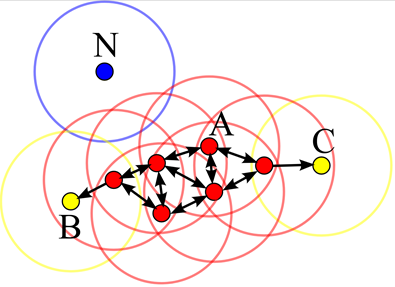

### DBSCAN Algorithm



1. Select an unprocessed point P
2. If P is not a Core Point (i.e. there are less than *minPts* points within range $\epsilon$), then classify P as noise and go back to Step 1 
3. Otherwise, if P is a core point, a new cluster is formed as follows: 
* Assign all neighbors of P (i.e. all points within distance $\epsilon$ from P) to the new cluster
* Repeat previous step for all newly-assigned neighbors
4. Go back to Step 1
5. Continue algorithm until all data points have been processed

#### Implementation of DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=.25, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)

## Linear Regression

### Pearson Correlation


In class you have seen the formula for the Pearson Correlation:
$\rho(a, b) = \frac{\sum_{i = 1}^{m} (a_i - \bar{a})(b_i - \bar{b})}{\sqrt{\sum_{i=1}^{m} (a_i - \bar{a})^2\sum_{i = 1}^{m}(b_i - \bar{b})^2}} $, where $\bar{a} = \frac{1}{m}\sum_{i=1}^{m} a_i$ and $\bar{b} = \frac{1}{m}\sum_{i=1}^{m} b_i$.

* Compute the Pearson Correlation $\rho$ between `x` and the target `y1`.
* Compute the Pearson Correlation between `x` and `y2`.
* Check that you get the same result as the reference implementation

###### Pearson- Korrelationskoeffizient
* kann Werte  zwischen  -1 und 1 annehmen. Bei -1 und 1 besteht vollständiger Zusammenhang. 0 keinerlei linearer Zusammenhang

In [ ]:
def my_pearson(x, y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)

  cent_x = x - mean_x
  cent_y = y - mean_y

  numerator = np.sum(cent_x * cent_y) #Zähler
  denominator = np.sqrt(np.sum(cent_x * cent_x) * np.sum(cent_y * cent_y)) # Nenner

  return numerator / denominator

print(f"rho(x, y1): {my_pearson(x, y1):.4f}")
print(f"rho(x, y2): {my_pearson(x, y2):.4f}")

### Univariate Linear Regression
#### Explicit Solution

You will now implement Linear Regression with a single variable. In class you have seen that the underlying model is: $y = \theta_0 + \theta_1x$.
You also derived the maximum likelihood estimates for $\theta_0$ and $\theta_1$:

* $\hat{\theta}_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m}(x_i - \bar{x})^2}$
* $\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}$

In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`
* In the `.fit` method you will have to compute $\hat{\theta}_0$ and $\hat{\theta}_1$.

In [ ]:
class UnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    y = self.theta_0 + self.theta_1 * x
    return y  # TODO

  def fit(self, x, y):
    pearson_coeff = np.corrcoef(x,y)[0,1]
    self.theta_1 = pearson_coeff * (y.std()/x.std())
    self.theta_0 = y.mean() - self.theta_1 * x.mean() #self.theta_1 ist aktualisiertes theta_1
    return self

### Univariate Linear Regression
#### with Gradient  Descent (approximation)

In class you have seen an alternative version to estimate the parameters $\theta_i$ of the linear regression models by using Gradient Descent.

For the univariate linear regression model, the stochastic gradient descent updates look like this:
* $\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \alpha (\theta_0 + \theta_1 x_t - y_t)$
* $\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \alpha (\theta_0 + \theta_1 x_t - y_t) x_t$

Here $\alpha$ is the learning rate, and $(x_t, y_t)$ is the data point sampled
at time $t$.


In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`.
* In the `.fit` method you will have to implement the update equations for
$\theta_0$ and $\theta_1$.

In [ ]:
class SGDUnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.
    self.rng = np.random.default_rng(RANDOM_SEED)

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y, n_iter: int = 100, learning_rate: float = 1.0):
    for t in range(n_iter):
      sample_ix = self.rng.integers(0, len(x))

      xt = x[sample_ix]
      yt = y[sample_ix]

      residual = (self.theta_0 + self.theta_1 * xt) - yt

      self.theta_0 -= learning_rate * residual
      self.theta_1 -= learning_rate * residual * xt
        
    '''
    unsere Lösung:
        temp_0 = self.theta_0 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt)
        temp_1 = self.theta_1 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt) * xt
        self.theta_0 = temp_0
        self.theta_1 = temp_1
    
    '''
    return self

#### Residuals

In [ ]:
def plot_residuals(y_pred, y_true):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, s=20, c="purple")
    plt.ylabel("Resiudals")
    plt.xlabel("y_pred")
    plt.grid()
    plt.show()

In [ ]:
#plot residuals for y1
plot_residuals(y1_predict, y1)

### MSE (Mean Squared Error)

In [ ]:
def mse(y_pred, y_true):
    return np.square(y_pred - y_true).mean()

#### Plot of Learning Rate

In [ ]:
n_iters = [50, 100, 200, 500, 1000, 2000]
learning_rates = [1., .1, .01]

# we plot the MSE achieved by the closed form model as a reference
closed_form = UnivariateLinearRegression()
closed_form.fit(x, y1)
mse_base = mse(y_pred=closed_form.predict(x), y_true=y1)
plt.plot(n_iters, np.ones_like(n_iters) * mse_base, label="closed form", linestyle='--', c='b')

for alpha in learning_rates:
    mses = []
    for n_iter in n_iters:
        # fit a SGDUnivariateLinearRegression model using n_iter=n_iter and
        # learning_rate=alpha
        # compute its mse and append the mse value to the mses list
        sgd_model = SGDUnivariateLinearRegression()
        sgd_model.fit(x, y1, n_iter=n_iter, learning_rate=alpha)
        y_predSGD = sgd_model.predict(x)
        mse_ = mse(y_predSGD, y1)#1.  # replace with mse calculation
        mses.append(mse_)
    plt.plot(n_iters, mses, label=f"alpha = {alpha:.2f}")

plt.xlabel("n_iter")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Polynominal- Regression

In [ ]:
mse_train_list, mse_test_list = [], []
for degrees in range(0, 11):
  polynomial_features = PolynomialFeatures(degree=degrees)
  x_poly = polynomial_features.fit_transform(X_train)

  model = LinearRegression()
  model.fit(x_poly, y_train)
  y_poly_pred = model.predict(x_poly)
  y_poly_pred_test = model.predict(polynomial_features.transform(X_test))

  mse_train = mean_squared_error(y_train, y_poly_pred)
  mse_test = mean_squared_error(y_test, y_poly_pred_test)

  mse_train_list.append(mse_train)
  mse_test_list.append(mse_test)

  plt.scatter(x, y, s=10)
  plt.scatter(X_train, y_poly_pred, color='r', s=10)
  plt.scatter(X_test, y_poly_pred_test, color='g', s=10)
  plt.show()

plt.plot(range(0, 11), mse_train_list, color="blue", label="MSE training")
plt.plot(range(0, 11), mse_test_list, color="green", label="MSE test")
plt.legend()
plt.show()

## Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

### Solution

\begin{align}
v_{poly} =
\begin{bmatrix}
1 & 3 & 9 \\
1 & 2 & 4 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{align}


In [ ]:
vec1 = np.array([3, 2, 0]).reshape((3, -1))
polynomial_features = PolynomialFeatures(degree=2)
print(polynomial_features.fit_transform(vec1))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=100, C=1.0, solver='lbfgs')
clf.fit(X_train_normalized, y_train)
predicted_Y = clf.predict(X_valid_normalized)

### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_valid, predicted_Y)
pre = precision_score(y_valid, predicted_Y, average='macro')
rec = recall_score(y_valid, predicted_Y, average='macro')
f1 = f1_score(y_valid, predicted_Y, average='macro')

print(f'accuracy_score: {acc}')
print(f'precision_score: {pre}')
print(f'recall_score: {rec}')
print(f'f1_score: {f1}')

### Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_valid, predicted_Y)
heatmap(cf_matrix, annot = True) #annot = Werte werden in der Matrix angezeigt

## TF-IDF

`sklearn.feature_extraction.text.TfidfVectorizer` works in the same manner as `sklearn.feature_extraction.text.CountVectorizer`. Perform the same steps as in 4a but in oder to get vectors with TF-IDF values.

**1.** Initialize TfidfVectorizer model and transform our examples to numerical features

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(documents)

**2.** Get the vocabulary

In [ ]:
# Get feature names
feature_names_tfidf = tfidf.get_feature_names_out()

# View feature names
feature_names_tfidf

**3.** Display the dataframe containing vocabulary in columns, documents presented in rows and TF-IDF values in cells.

In [ ]:
pd.DataFrame(
    tfidf_vectors.todense(), 
    columns=feature_names_tfidf
    )

**4.** Calculate the average TF-IDF value per word (ignore and leave out NaN or Nulls). Then sort the words by average TF-IDF value.

In [ ]:
pd.DataFrame(
    tfidf_vectors.todense(), 
    columns=feature_names_tfidf
    ).replace(0, np.NaN).mean(axis=0).sort_values()

## Confusion Matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix_test, annot=True)

### Create functions that calculate Precision, Recall and F1-Score. 
1. Implement your own functions for calculating Precision, Recall and F1-Score. Don't use any of the existing libraries for this.
2. Apply them on the example above for the class `0`.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from seaborn import heatmap

cf_matrix = confusion_matrix(y_test, y_test_pred)

ax = heatmap(cf_matrix, annot = True, cmap='PiYG')
ax.set(xlabel="Predicted Class", ylabel="True Class")

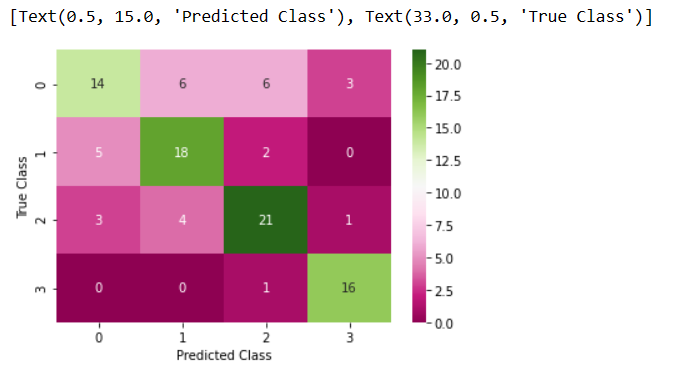

In [ ]:
#https://www.moonbooks.org/Articles/How-to-create-a-confusion-matrix-and-infer-the-true-positive-true-negative-false-positive-and-false-negative-values-using-scikit-learn-in-python-/
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  #axis 0 = columns
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)  #axis 1 = rows
TP = np.diag(cf_matrix) #korrekt
TN = cf_matrix.sum() - (FP + FN + TP)

print(FP,FN,TP,TN)

In [ ]:
def precision(class_of_interest, confusion_matrix_test):
    #TP/(TP + FP)
    score  = np.round(TP[class_of_interest]/(TP[class_of_interest] + FP[class_of_interest]),2)
    return score

def recall(class_of_interest, confusion_matrix_test):
    #TP/(TP + FN)
    score = np.round(TP[class_of_interest]/(TP[class_of_interest] + FN[class_of_interest]),2)
    return score

def f1_score(precision_value, recall_value):
    #2*(Precision * Recall)/(Precision + Recall)
    score = np.round(2 * (precision_value * recall_value)/(precision_value + recall_value),2)
    return score

In [ ]:
#können alle 4 Werte identisch sein? Also nicht alle = 1, sondern alle denselben Wert. -> ja, z. B. mit 0.5
precision_value = precision(0,cf_matrix )
recall_value = recall(0, cf_matrix)
f1_score_test = f1_score(precision_value, recall_value)

print(f"Precision (Class 0): {precision_value}")
print(f"Recall (Class 0): {recall_value}")
print(f"F1-Score (Class 0): {f1_score_test}")

### Check your results 
Use the function `classification_report` of `sklearn.metrics` to compare their results to your own implementation

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_test_pred, target_names=target_names))
#macro avg: arithmetisches Mittel
#weighted avg: gewichteter Duchschnitt anhand der Support- Values

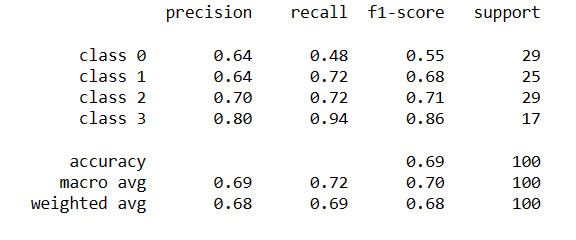

### Other Example for TF-IDF (aus Vorlesung)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = """ the quick brown fox jumps over the lazy brown dog mr brown jumps over the lazy fox the lazy
dog and mr brown jump over another dog """.split("\n")[1:-1]

In [ ]:
def preprocessing(line):
    line = line.lower()
    return line

In [ ]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing, )
tfidf = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names()
corpus_index = [n for n in corpus]
pd.DataFrame(tfidf.todense(), index=corpus_index, columns=feature_names)

## SVM's

### 2a. Handle unbalanced data using class weights

In this exercise we will explore how the `class_weight` parameter can be used to handle unbalanced data.

We have seen previously that `C` "punishes" data points that lie on the wrong side of the classification boundary. The `class_weight` parameter follows a similar idea. It allows us to control how harshly we punish points on the wrong
side for each class separately. For example, we could choose to force more yellow points to be on the right of the boundary, by giving them more *weight*. This means they will be counted more during training and mis-classifications are punished more.

The default value for the `class_weight` parameter is `None` and means both
classes will have a weight of 1.

You can manually set weights using a dictionary:
```
my_class_weights = {
  0: 1.0,
  1: 1.0,
}
```
The keys correspond to the class labels (in our case 0 for red and 1 for yellow)
and the values correspond to the weight we want to set. We can then set `class_weight=my_class_weights`.


Finally, you can specify `class_weight='balanced'`. In that case, `sklearn` tries to automatically determine good class weights. Let $n$ be the total number of samples (1100 in our case), $c$ the total number of classes (2 in our case), and $n_i$ the number of samples in class $i$ (in our case $n_0 = 1000$ and $n_1 = 100$, then it computes the class weights $w_i$ as $w_i = \frac{n}{c n_i}$.

In [ ]:
#fit the model using weighted classes
my_class_weights = {
    0: 1.0,  # weight for red class
    1: 10.0,  # weight for yellow class
}
wclf = LinearSVC(class_weight='balanced') 
wclf.fit(X_unbal, y_unbal)

## Random Forest (aus Vorlesung)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClasifier(n_estimators= 100, oob_score = True)
model.fit(X, y)
print(model.oob_score_) # prints the out of bag score for this fit

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
param_grid = {
'n_estimators':np.arange(8, 16, 32, 64, 100, 200, 500),
'max_features':np.arange(0.1, 0.3, 0.7),
'max_depth': [3, 5, 7, 9],
'max_samples': [0.3, 0.5, 0.8]}
model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_


## PCA

### How many Principal Components are needed to get a good representation of our data?

In [ ]:
explained_ratio = pca.explained_variance_ratio_

n_components = list(range(1, 31))  # [1, 2, ..., 30]
plt.plot(n_components, explained_ratio, marker='o', color='blue') #"Explained" Variance
plt.plot(n_components, explained_ratio.cumsum(), marker='', color='green', drawstyle="steps-post") #Cumulative Variance
print(explained_ratio.cumsum())

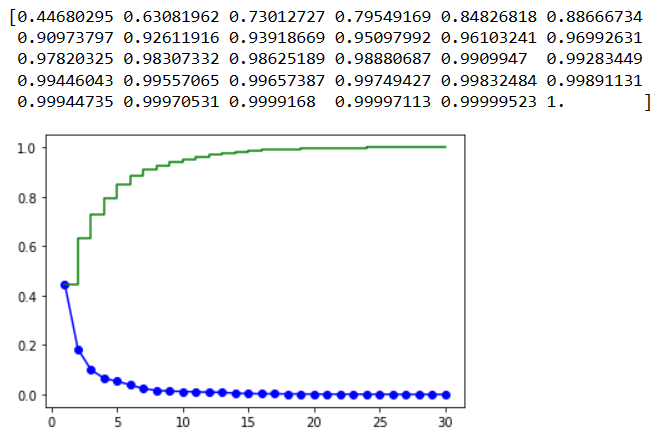

In [ ]:
#ellbow- Method

from sklearn.decomposition import PCA

explained_ratio = pca.explained_variance_ratio_

n_components = list(range(1, 31))  # [1, 2, ..., 30]
plt.plot(n_components, explained_ratio, marker='o', color='blue')

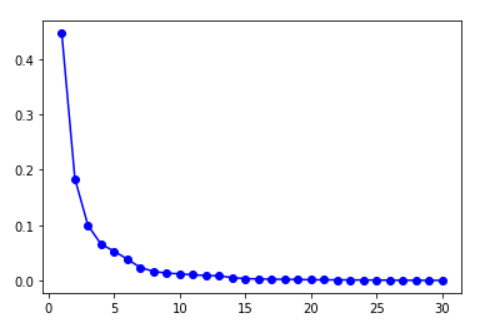

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.90) # adapt Parameter for desired explained variance
pca.fit(x_train_norm)

x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

print("Number of dimensions before: ", x_train_norm.shape[1])
print("Number of dimensions after: ", x_train_pca.shape[1])

Number of dimensions before:  30

Number of dimensions after:  7

## Neural Network

### A simple numpy-only implementation of our network
In this task we will implement the above network  𝑁𝑁(𝑥,𝑊,𝑢)  in numpy and try to solve the XOR-problem with it.

In the next cell, we set up the simplest instance of the XOR-problem with 4 data points. Observe that there is no straight line that separates the two classes properly.

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
X = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1],
])

y = np.array([1, 0, 0, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In the next cell, we set the initial weights of our network  𝑊  and  𝑢  randomly. We will update them in the training loop further down.

In [ ]:
# We randomly initialize the weight matrices W, u 
# with weights uniformly in [-1, 1]

rng = np.random.default_rng(RANDOM_SEED)

W = 2.*rng.random((2, 3)) - 1.
u = 2 * rng.random(3) - 1.

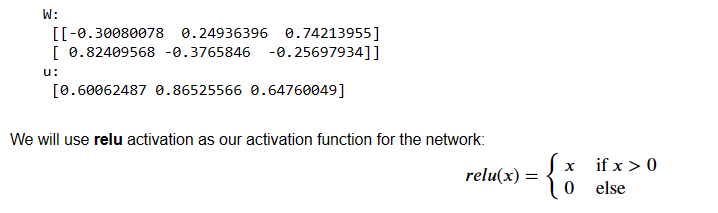

**sigmoid** activation (if activation changes in SEP- task!)
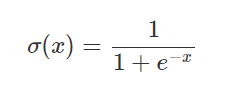

In [ ]:
def activation(x: np.array) -> np.array:
  """£
  Compute relu activation for a given input

  x: a numpy array of any shape (containing floats)
  """
  #return 1 /(1 + np.exp(-x)) #sigmoid
  return np.maximum(0., x) #relu

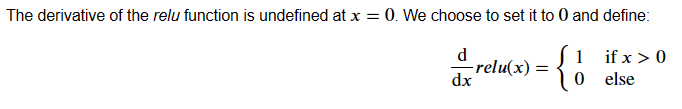

**sigmoid** derivate (if activation changes in SEP- Tasks!)
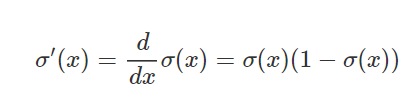

In [ ]:
def derivative_activation(x: np.array) -> np.array:
  """
  Compute the derivative of relu activation for a given input.

  x: a numpy array of any shape (containing floats)
  """
  # the comparison here results in an array of booleans, which we cast to float 
  #return (1 /(1 + np.exp(-x))) * (1 - (1 /(1 + np.exp(-x))))# derivative of sigmoid
  return (x > 0.).astype(float) # derivate of relu

### Implement the forward pass

You now should have all the tools to compute the output of the neural network
for a given input $(x_1, x_2)$.

We call this computation the *forward pass* of the network, because we pass values through the network layer by layer from input to output.

Below, we have given you again the function computed by the network. In the last line we added the matrix notation.

\begin{align}
  NN(x, W, u) &= \sigma(u_1\sigma(w_{11}x_1 + w_{21}x_2) + u_2\sigma(w_{12}x_1 + w_{22}x_2) + u_3\sigma(w_{13}x_1 + w_{23}x_2)) \\
  &= \sigma(\sum_{i = 1}^{3} u_i\sigma(w_{1i}x_1 + w_{2i}x_2)) \\
  &= \sigma(u\sigma(x^TW))
\end{align}

In [ ]:
def forward_pass(
  x: np.array,
  W: np.array,
  u: np.array,
):
  """
  Implement the forward pass for our network NN(x, W, u)

  x: a 2-element vector containing x_1 and x_2 (numpy array of shape (2,))
  W: a 2x3 matrix containing weights w_ji (numpy array of shape (2, 3))
  u: a 3-element vector containing u_i (numpy array of shape (3,))

  In this notation the index i goes from 1 to 3 and refers to hidden nodes
  the index j goes from 1 to 2 and indexes the input dimensions

  Note: numpy array indices start from 0 not from 1
  """
  return activation(u @ activation(x.T @ W))

In the next cell, we compute the predictions of our network for our data:

In [ ]:
print("index", "x", "y", "prediction", sep="\t")
for i in range(4):
  print(i, X[i, :], y[i], forward_pass(X[i, :], W, u), sep="\t")

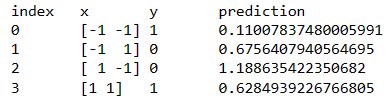

### Computing Gradients

In the next cell we implement the formulas to compute all partial derivatives for the weights of our network according to the formulae we gave above in Section "Derivatives for the larger Network".

You should at least understand what the inputs and outputs mean, but you do not necessarily have to fully understand the implementation.

In [ ]:
def grads(y, x, W, u):
  """
  Compute all partial derivatives of the loss at the sample x, y
  for all weights u_i and w_ji in our network

  y: float indicating the true label of the sample (either 0. or 1.)
  x: a 2-element vector containing x_1 and x_2 of our sample (numpy array of shape (2,))
  W: a 2x3 matrix containing weights w_ji (numpy array of shape (2, 3))
  u: a 3-element vector containing u_i (numpy array of shape (3,))

  returns:
    grad_u: a 3-element vector containing partial derivatives d/du_i
    grad_w: a 2x3 matrix containing partial derivatives d/dw_ji
  """
  pred = forward_pass(x, W, u)

  # compute derivative of our squared error loss
  derivative_loss = pred - y # analog 1b)

  # compute derivative of the output activation
  deriv_output = derivative_activation(u @ activation(x.T @ W))
  grad_u = np.zeros_like(u)

  for i in range(3):
    # compute derivatives with respect to u_i according to the formula in Task 1
    grad_u[i] = derivative_loss * deriv_output * activation(W[:, i] @ x)

  grad_w = np.zeros_like(W)
  for i in range(3):
    for j in range(2):
      # compute derivatives with respect to w_ji according to the formula in Task 1
      grad_w[j, i] = derivative_loss * deriv_output * u[i] * derivative_activation(W[:, i] @ x) * x[j]
  
  return grad_u, grad_w

### Training the network using Stochastic Gradient Descent

Below we give you the setup for the main learning loop. Your task is to implement the weight updates according to stochastic gradient descent.

For stochastic gradient descent, at each time step $t$ we sample one data point $x^{(t)}$ and its label (the desired output) $y^{(t)}$.
Let $L^{(t)} = \mathcal{L}(y^{(t)}, NN(x^{(t)}, W, u)$ be the loss at time $t$. Then we update our weights as follows:

\begin{align}
  u_{i}^{(t+1)} = u_{i}^{(t)} - \alpha \frac{\mathrm{d}}{\mathrm{d}u_i}L^{(t)} \\
  w_{ji}^{(t+1)} = w_{ji}^{(t)} - \alpha \frac{\mathrm{d}}{\mathrm{d}w_{ji}}L^{(t)} \\
\end{align}

where $\alpha$ denotes the learning rate.

*Note:* In this simple example where we try to learn a very simple xor-function we only have 4 samples. To show the learning dynamics we choose stochastic gradient descent over batch gradient descent.

* choose an appropriate `learning_rate` $\alpha$
* choose a maximum number of update steps `n_steps`
* implement the weight updates for `W` and `u`

In [ ]:
learning_rate = 0.4  # choose appropriate learning rate
n_steps = 40       # choose an appropriate number of training iterations


losses = []
for t in range(n_steps):
    # randomly sample one of the 4 data points
    sample_ix = rng.integers(4)
    x_t = X[sample_ix]
    y_t = y[sample_ix]

# compute and log squared error for the current sample
    loss = 0.5 * (y_t - forward_pass(x_t, W, u))**2
    losses.append(loss)
    
  # compute gradients (partial derivatives of our weights)
    grad_u, grad_w = grads(y_t, x_t, W, u)

# update our weights
    W = W - learning_rate * grad_w
    u = u - learning_rate * grad_u 

# plot learning curve
plt.plot(np.arange(n_steps), losses)


## Neural Network basic implementation

In [ ]:
from keras import Sequential
from keras.layers import Activation, Dense

model = Sequential() #Jedes Layer hintereinandergeschaltet
model.add(Dense(3, input_shape=(2,), use_bias=True, activation="relu"))
model.add(Dense(1, use_bias=True, activation="relu"))


#### How many parameters does this neural network have?

**Answer:**
2(input) * 3(hidden) * 1(out) = 9

The method `model.summary()` gives an overview of the different layers in our models, showing in particular the number of trainable parameters in our network.

In [ ]:
# Je nach Initialisierung können unterschiedliche Werte entstehen.
# Hier sehr markant, weil Netzwerk sehr klein ist (mit 13 Parametern)
model.summary()

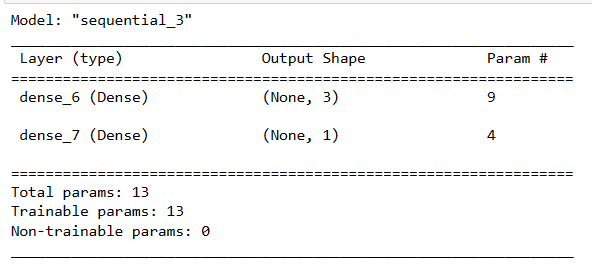

In the next cell, we prepare the model for training using the .compile method. We have to tell it what kind of optimization algorithm we want to use with the optimizer argument. To stay consistent with the example above, we choose optimizer="sgd" for "stochastic gradient descent". Similarly, we have tell it what loss function to minimize. We choose loss="mse" (even though for classification, loss='binary_crossentropy would be more appropriate, but again we want to stay close to the manual example above).

By default, keras will log the loss during training. We can additionally ask it to compute and log additional metrics. Below, we pass metrics=['accuracy'] to also log accuracy while training.

Note: accuracy and loss will be computed and logged on the training data

In [ ]:
model.compile(optimizer="sgd", loss="mse", metrics=['accuracy'])

Finally, we can train our model using the `.fit` method. It takes the training data `X` and desired values `y` as input. The argument `epochs` defines how many times we will loop over our dataset while updating, and `batch_size` defines how many data points will be used to update the weights at the same time. A `batch_size > 1` corresponds to batch gradient descent.

During training, Keras will indicate progress and log the loss, as well as additional metrics for each epoch.

The `.fit` method returns a `History` object that contains (among other things) the logged losses and metrics for each epoch.

In [ ]:
 model.fit(X, y, epochs=10, batch_size=1)

In [ ]:
def plot_history(history: keras.callbacks.History):
  """
  plot the training and validation loss for each training epoch

  history: a History object, output of the .fit method of a keras model
  """
  n = len(history.history['loss'])
  plt.plot(np.arange(n), history.history['loss'], label="training loss")
  plt.plot(np.arange(n), history.history['val_loss'], label="validation loss")
  plt.xticks(range(0, n + 1, 2))
  plt.legend()
  plt.show()

### Add a Dropout layer

In the next cell, we redefine the same model as above. Your task is to add a `Dropout` layer. The main argument for the dropout layer is `rate` which defines the **fraction of nodes** that should be dropped. For example `Dropout(rate=0.5)` would drop exactly half of the nodes every time.

**Note:** If you ever use another framework than keras, their dropout implementation might be defined such that you specify the fraction of nodes to keep.

**Task**: add a `Dropout` layer after the hidden layer and set an appropriate `rate` parameter.

**CAVE:**  Nie ganz am Anfang und nie ganz am Schluss ein Dropout verwenden (Daten werden so verworfen!!)

In [ ]:
from keras.layers import Dropout

# TODO: add a Dropout layer
model_dropout = Sequential()
model_dropout.add(Input(shape=(28, 28)))
model_dropout.add(Flatten()) # flatten nur weil es Bilder sind
model_dropout.add(Dense(128, activation="relu"))
model_dropout.add(Dropout(rate=0.25))
model_dropout.add(Dense(10, activation="softmax"))

model_dropout.summary()

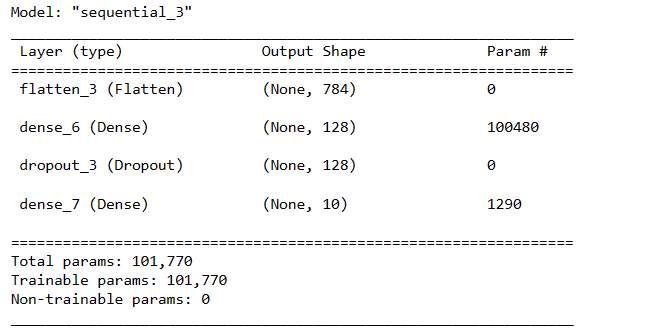

In [ ]:
model_dropout.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_dropout.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=20,
  validation_split=.1,
)

In [ ]:
plot_history(history)

### Early-Stopping

Keras provides an implementation of early stopping using the `EarlyStopping` class.

We can define a parameters to control how early stopping is applied. The general idea is to stop training once a particular metric does not improve any more. We want to stop training once the validation loss does not decrease anymore. For this we set `monitor="val_loss"` to tell it to check the values of the validation loss. Since we want to stop once we achive a minimal validation loss, we set `mode="min"`. Finally, we set `patience=1` to tell it to stop training after the validation loss has not improved for 1 whole epoch.

We then pass the `EarlyStopping` instance as a callback to the `.fit` method, using `callbacks=[early_stopping]`. Keras implements several functionalities using callbacks that run at the end of every epoch, early stopping is one of them.

In [ ]:
from keras.callbacks import EarlyStopping

# prepare our model
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=1,
)

# note that we pass the early_stopping object as a callback here
history = model.fit(
  x_train,
  y_train,
  batch_size=16,
  epochs=40,
  validation_split=.1,
  callbacks=[early_stopping]
)

plot_history(history)

## CNN

### Convolutional in keras

In [ ]:
from keras.layers import Conv2D
#kernel_size=(width, height), legt die Grösse des Filters fest
conv = Conv2D(filters=10, kernel_size=(3, 3), activation="sigmoid") 

example_input = x_train[:1, :, :, :]
print("input shape: ", example_input.shape)

out = conv(example_input)

print("output shape: ", out.shape)

### Max Pooling in Keras

In [ ]:
from keras.layers import MaxPooling2D

pool = MaxPooling2D(pool_size=(2, 2))

example_input = x_train[:1, :, :, :]
print("input shape: ", example_input.shape)

out = pool(example_input)

print("output shape: ", out.shape)

### A CNN for CIFAR10

In [ ]:
# here we import everything you need to build the CNN
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

To get you started we define the following CNN:
* an `Input` layer, specifying the correct `shape` of the input images
* a `Conv2D` layer with 32 3x3 filters and *relu* activation
* a 2x2 `MaxPooling2D` layer
* a `Flatten` layer to reshape the data into flat vectors
* a `Dense` layer with 10 units and *softmax* activation


In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
  x_train,
  y_train,
  epochs=30,
  batch_size=32,
  validation_split=.1,
)

In [ ]:
def plot_learning_curves(history):
  n = len(history.history['loss'])
  plt.plot(np.arange(1, n+1), history.history['loss'], label="training loss")
  plt.plot(np.arange(1, n+1), history.history['val_loss'], label="validation loss")
  plt.legend()
  plt.xticks(np.arange(1, n+1, 2))

In [ ]:
plot_learning_curves(history)

In [ ]:
from sklearn.metrics import classification_report

predicted_class_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_class_probabilities, axis=1)

print(classification_report(y_true=y_test, y_pred=predicted_labels, target_names=class_names))